In [398]:
# Supress warnings
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = pd.read_csv('car data.csv')
df = pd.DataFrame(data)
df.head()
df.describe(include='all')


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [401]:
df.shape
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [402]:
df_categorical_variables= pd.DataFrame(data,columns= ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])
df_categorical_variables.describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [404]:
# Deleting the "Car_Name" feature because, in the real world, the price of the car is not predicted based on the car's name
df1 = df.drop("Car_Name", axis= 1)

In [405]:
# Checking duplicates
df1.loc[df1.duplicated()]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [406]:
df1[df1.duplicated(keep=False)]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [407]:
df2=df1.drop_duplicates(keep='first')

In [408]:
df2.shape

(299, 8)

In [409]:
df2.isnull().sum()*100 / df2.shape[0]

Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [410]:
latest_year=df2.Year.max()+1
latest_year

2019

In [411]:
df2['Age']= latest_year- df2['Year']
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


In [412]:
change_column_order = ['Year','Age','Selling_Price','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df3=df2.reindex(columns= change_column_order)
df3.head()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [413]:
df3.Selling_Price.describe()

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [414]:
Selling_price_mean_median= df3.Selling_Price.mean()- df3.Selling_Price.median()
print(Selling_price_mean_median*1000 ,"$")

1079.6321070234117 $


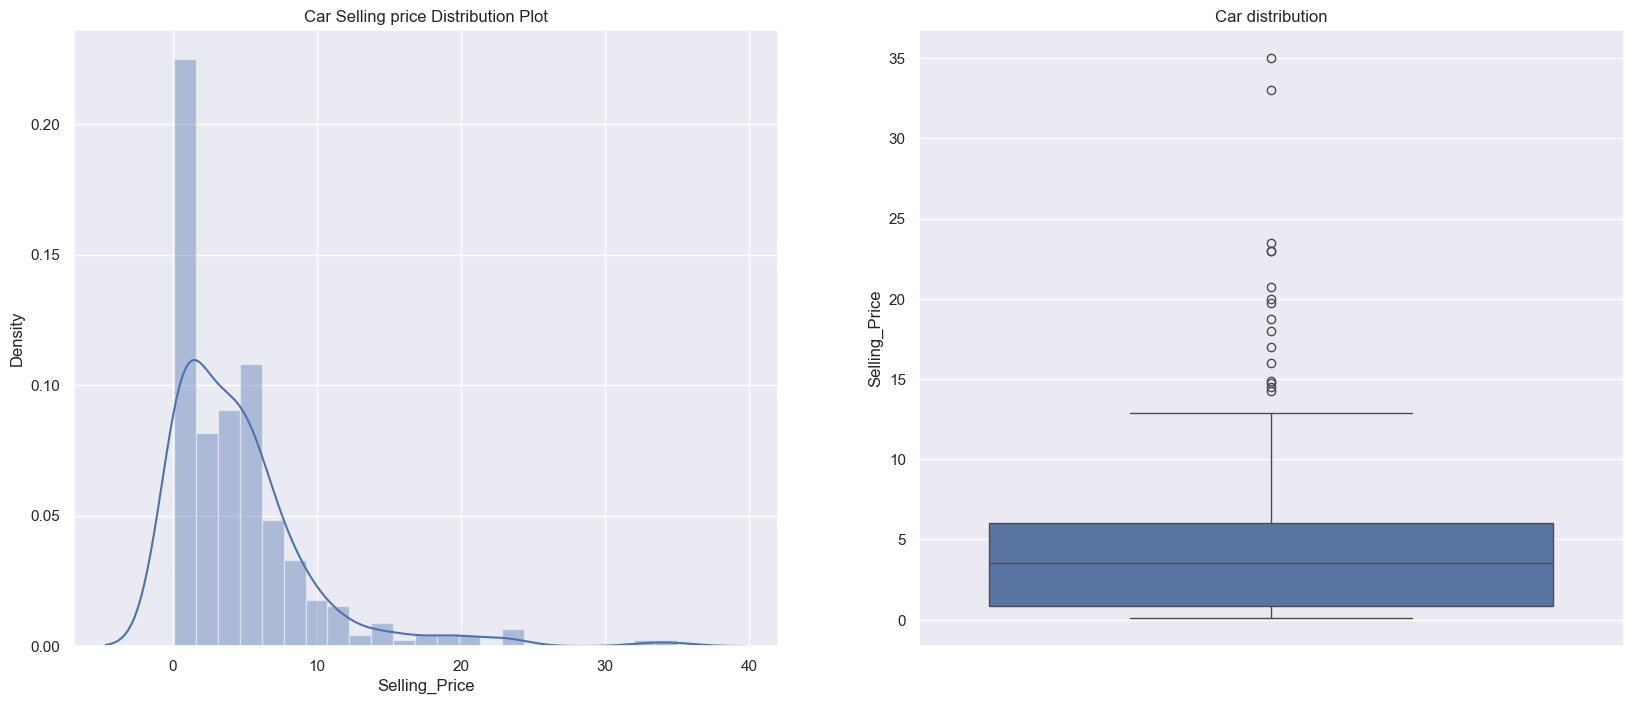

In [415]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Selling price Distribution Plot')
sns.distplot(df3.Selling_Price)
sns.set_style('darkgrid')


plt.subplot(1,2,2)
plt.title("Car distribution")
sns.boxplot(df3.Selling_Price)
sns.set_style('darkgrid')

plt.show()


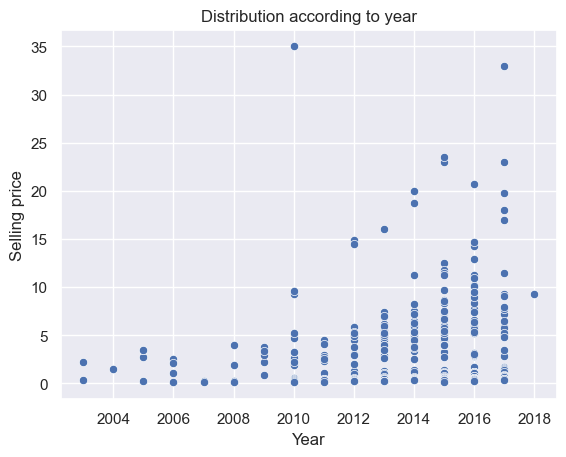

In [416]:
sns.scatterplot(data=df3, y="Selling_Price", x="Year")
sns.set_style("darkgrid")
plt.title("Distribution according to year")
plt.xlabel("Year")
plt.ylabel("Selling price")
plt.show()

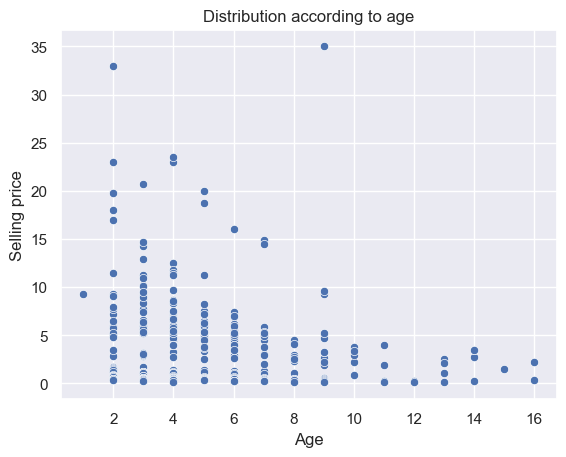

In [417]:
sns.scatterplot(data=df3, y="Selling_Price", x="Age")
sns.set_style("darkgrid")
plt.title("Distribution according to age")
plt.xlabel("Age")
plt.ylabel("Selling price")
plt.show()

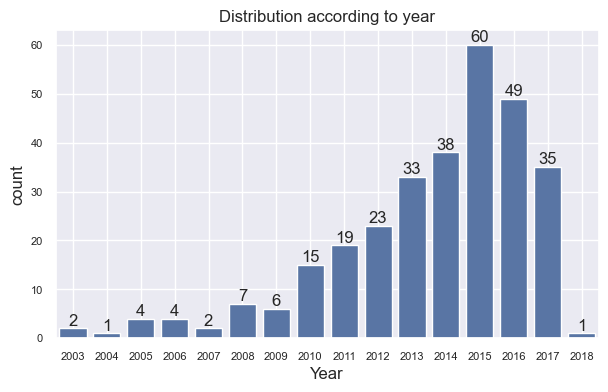

In [418]:
plt.figure(figsize= (7,4))
ax=sns.countplot(data=df3, x="Year")
plt.title("Distribution according to year")
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')
plt.show()

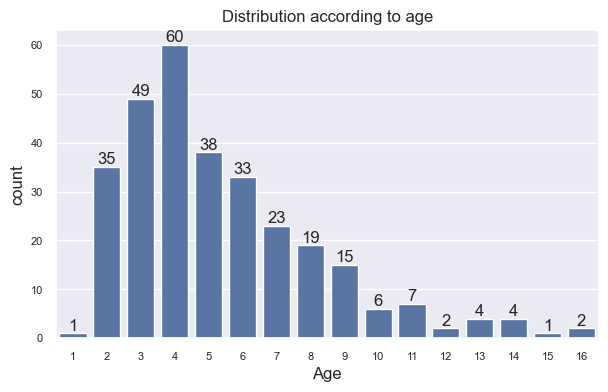

In [419]:
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df3, x= "Age")
plt.title("Distribution according to age")
sns.set_style("darkgrid")
for cont in ax.containers:
    ax.bar_label(cont)
plt.xticks(size= 8)
plt.yticks(size=8)
plt.show()

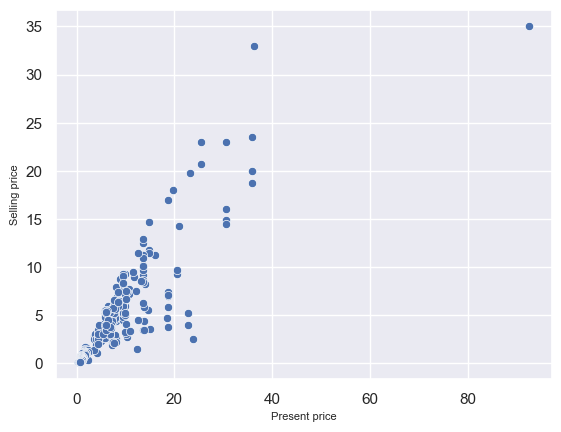

In [420]:
sns.scatterplot(data=df3, x=df3.Present_Price, y= df3.Selling_Price)
sns.set_style("darkgrid")
plt.ylabel("Selling price", size=8)
plt.xlabel("Present price", size= 8)
plt.show()


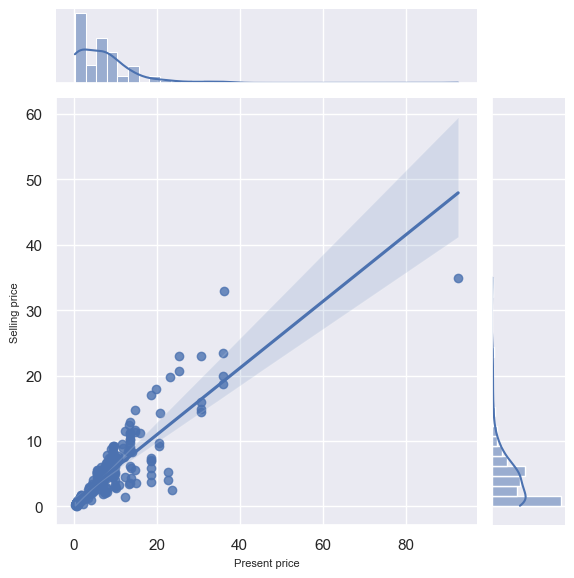

In [421]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=df3, x=df3.Present_Price, y=df3.Selling_Price, kind="reg")
plt.ylabel("Selling price", size=8)
plt.xlabel("Present price", size= 8)
plt.show()

In [422]:
df3[(df3.Selling_Price>30) & (df3.Present_Price>80)].index

Index([86], dtype='int64')

In [423]:
df3.iloc[[86]]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
87,2012,7,5.9,13.74,56000,Petrol,Dealer,Manual,0


In [424]:
df3["Proportion_S_P_Price"]= df3.Present_Price/df3.Selling_Price
df3.iloc[[86]]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Proportion_S_P_Price
87,2012,7,5.9,13.74,56000,Petrol,Dealer,Manual,0,2.328814


In [425]:
df3["Proportion_S_P_Price"].nlargest(10)

85     9.492000
77     8.233333
200    7.500000
37     6.514286
94     5.695000
90     4.897368
199    4.833333
78     4.348571
55     4.177778
47     3.952381
Name: Proportion_S_P_Price, dtype: float64

In [426]:
df3=df3.drop("Proportion_S_P_Price", axis=1)
df3.Present_Price.describe()

count    299.000000
mean       7.541037
std        8.567887
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
max       92.600000
Name: Present_Price, dtype: float64

In [427]:
Present_Price_mean_median = df3.Present_Price.mean() - df3.Present_Price.median()
print (Present_Price_mean_median*1000,"$")

1441.0367892976587 $


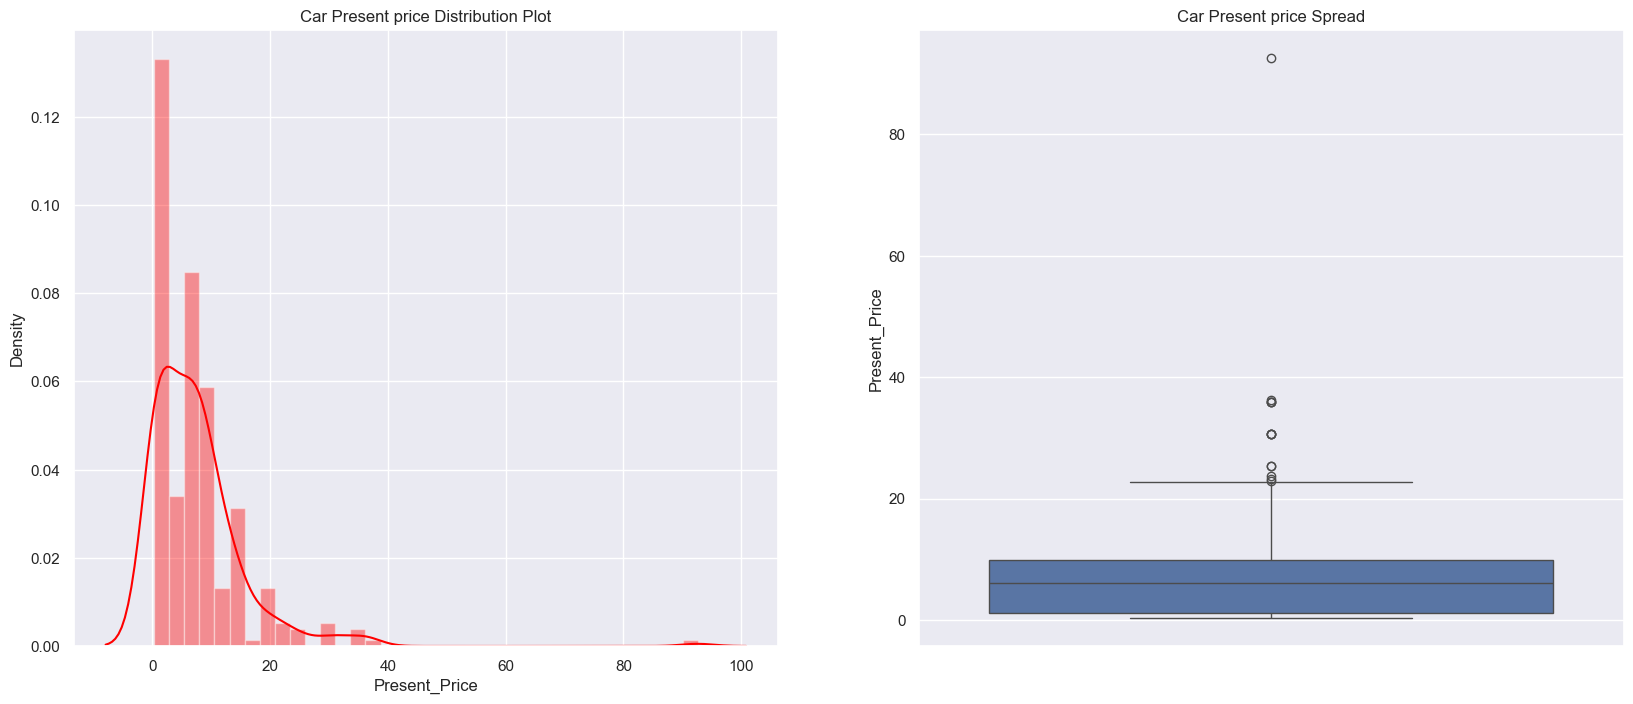

In [428]:
# Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Present price Distribution Plot')
sns.distplot(df3.Present_Price, color='red')
# Spread
plt.subplot(1,2,2)
plt.title('Car Present price Spread')
sns.boxplot(y=df3.Present_Price)

plt.show()

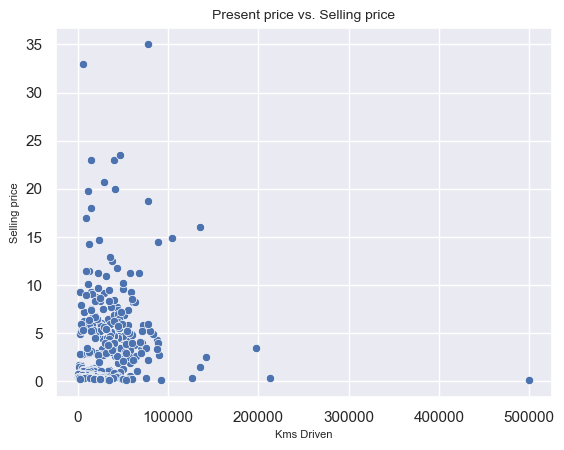

In [429]:
sns.scatterplot(data=df3, y= df3.Selling_Price, x=df3.Kms_Driven)
sns.set_style("darkgrid")
plt.title("Present price vs. Selling price", size=10)
plt.xlabel("Kms Driven" ,size=8)
plt.ylabel("Selling price", size=8)
plt.show()

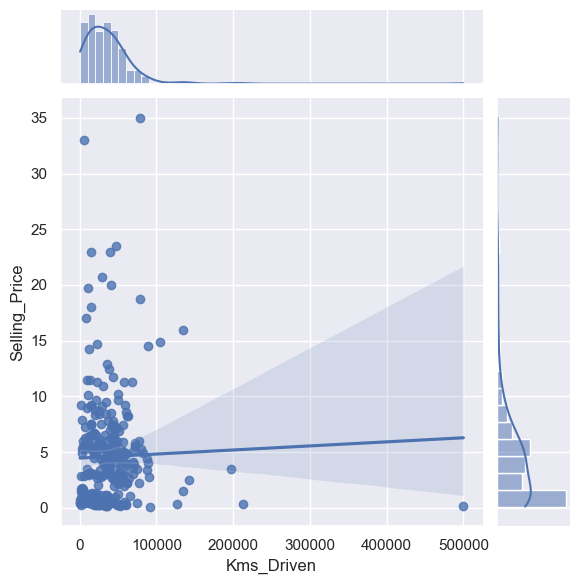

In [430]:
sns.jointplot(x=df3.Kms_Driven, y= df3.Selling_Price, kind="reg")
sns.set_style("darkgrid")
plt.show()

In [431]:
np.corrcoef(df3.Kms_Driven, df3.Selling_Price)

array([[1.        , 0.02856559],
       [0.02856559, 1.        ]])

In [432]:
df3[(df3.Selling_Price<5)&(df3.Kms_Driven>400000)]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,2008,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [433]:
df[df["Car_Name"] == "Activa 3g"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [434]:
df3.Kms_Driven.describe()

count       299.000000
mean      36916.752508
std       39015.170352
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48883.500000
max      500000.000000
Name: Kms_Driven, dtype: float64

In [435]:
Kms_Driven_Mean_Meadian=df3.Kms_Driven.mean()-df3.Kms_Driven.median()
print (Kms_Driven_Mean_Meadian,"Kms")

4916.752508361205 Kms


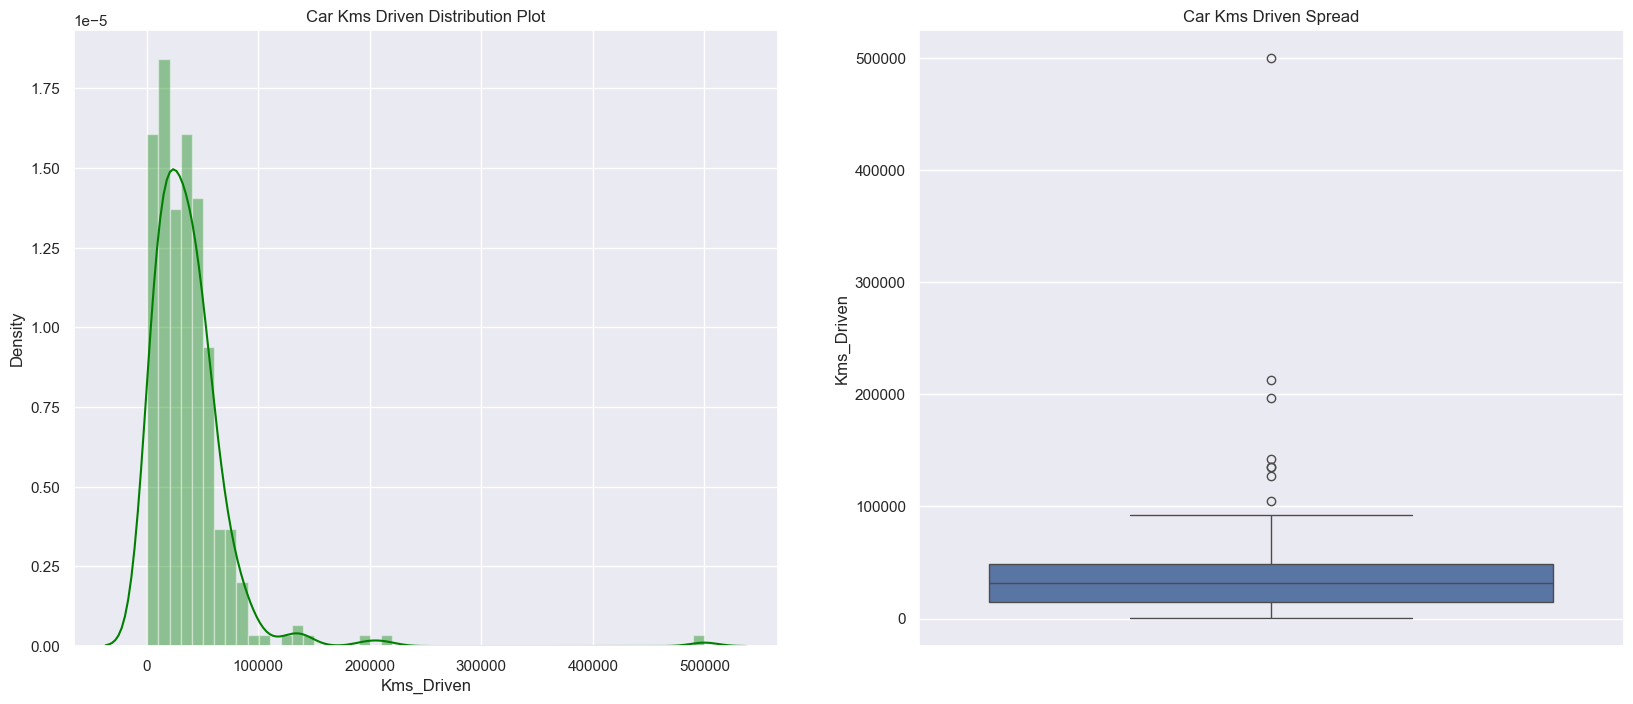

In [436]:
#Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Kms Driven Distribution Plot')
sns.distplot(df3.Kms_Driven, color='green')

#Spread
plt.subplot(1,2,2)
plt.title('Car Kms Driven Spread')
sns.boxplot(y=df3.Kms_Driven)

plt.show()

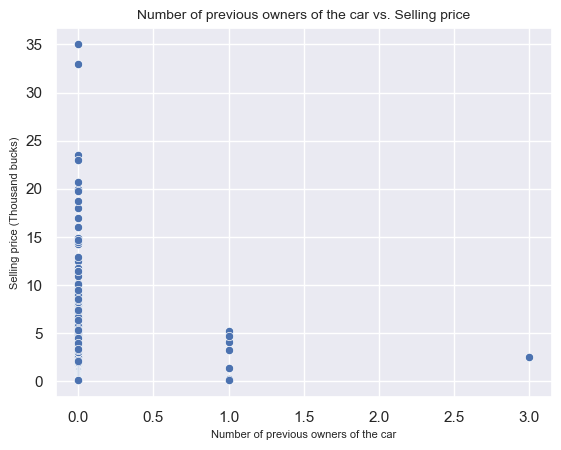

In [437]:
# plotting the target-Owner scatter graph
sns.scatterplot(data=df3, x="Owner", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Number of previous owners of the car vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Number of previous owners of the car", size=8)
plt.show()

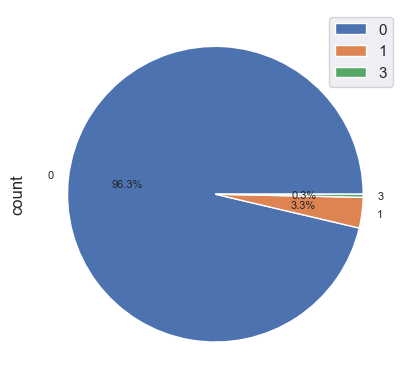

In [438]:
df_sym=pd.DataFrame(df3.Owner.value_counts())
df_sym.plot.pie(subplots=True, labels=df_sym.index.values, autopct="%1.1f%%",fontsize=8)
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()

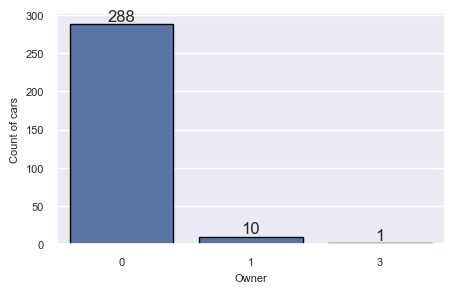

In [439]:
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Owner, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Owner', size=8)
plt.xticks(size=8)
plt.show()

In [440]:
df[df["Owner"] == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [441]:
df[df["Owner"] == 1]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual,1
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
205,grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1


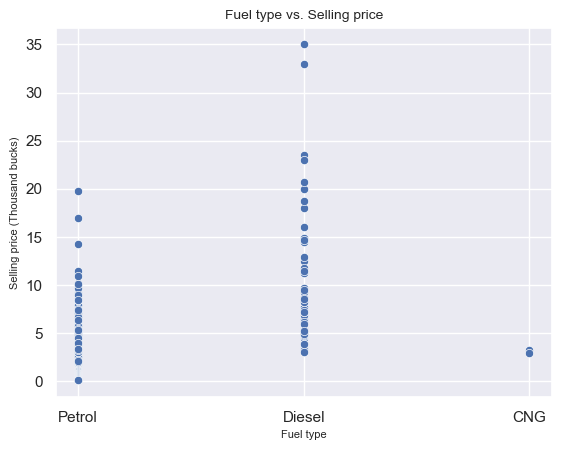

In [442]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Fuel_Type", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Fuel type vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Fuel type", size=8)
plt.show()

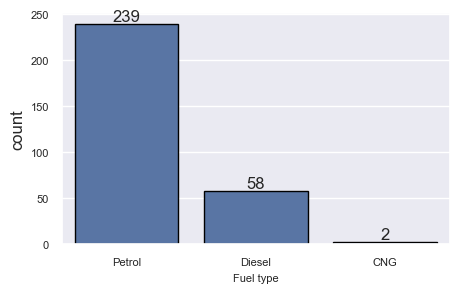

In [443]:
# Count of cars by fuel type
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Fuel_Type, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.yticks(size=8)
plt.xlabel('Fuel type', size=8)
plt.xticks(size=8)
plt.show()

In [444]:
df[df["Fuel_Type"] == "CNG"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


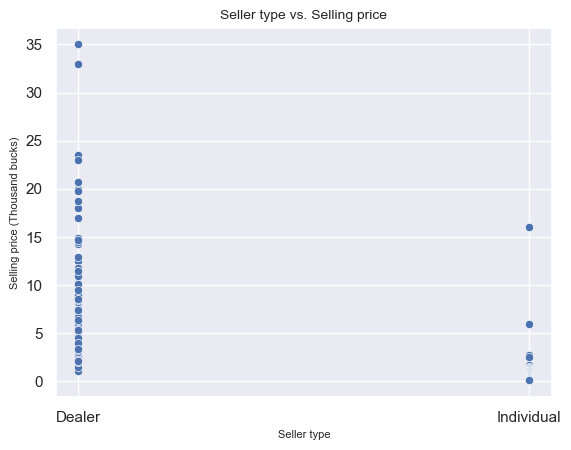

In [445]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Seller_Type", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Seller type vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Seller type", size=8)
plt.show()

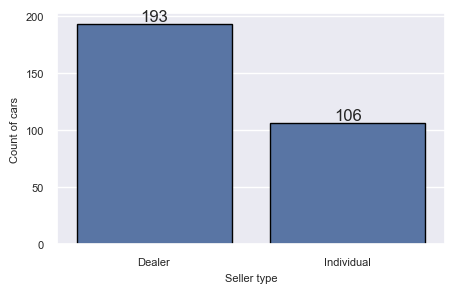

In [446]:
# Count of cars by Seller type
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Seller_Type, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Seller type', size=8)
plt.xticks(size=8)
plt.show()

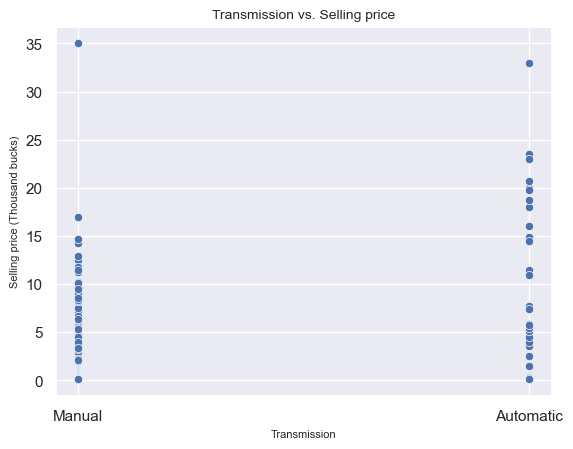

In [447]:
# plotting the target-Fuel type scatter graph
sns.scatterplot(data=df3, x="Transmission", y="Selling_Price")
sns.set_style('darkgrid')
plt.title("Transmission vs. Selling price", size=10)
plt.ylabel("Selling price (Thousand bucks)", size=8)
plt.xlabel("Transmission", size=8)
plt.show()

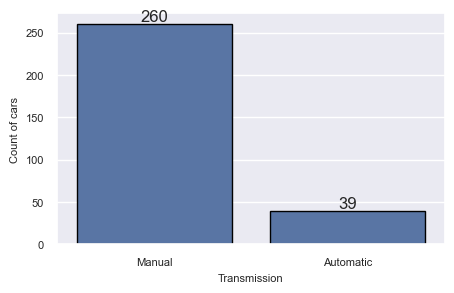

In [448]:
# Count of cars by Transmission
plt.figure(figsize = (5, 3))
ax=sns.countplot(data=df3, x=df3.Transmission, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Count of cars', size=8)
plt.yticks(size=8)
plt.xlabel('Transmission', size=8)
plt.xticks(size=8)
plt.show()

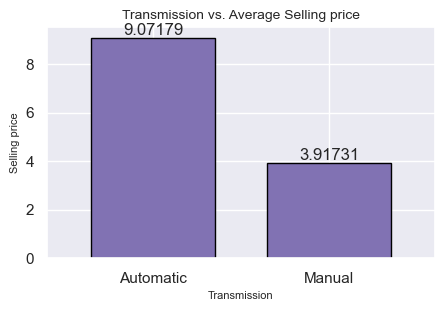

In [449]:
plt.figure(figsize = (5, 3))
a=df3.groupby('Transmission')['Selling_Price'].mean()
ax = a.plot.bar(ec='black', width=.7, color="m")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Transmission vs. Average Selling price', size=10)
plt.ylabel("Selling price", size=8)
plt.xlabel('Transmission', size=8)
plt.xticks(rotation=0)
plt.show()

In [450]:
df4=df3.drop("Year", axis=1)
df4.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [451]:
df_num=df4.select_dtypes(exclude="object")
df_obj=df4.select_dtypes(include="object")

In [452]:
df_obj=pd.get_dummies(data=df_obj,  drop_first=True)
df_obj.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,False,True,False,True
1,True,False,False,True
2,False,True,False,True
3,False,True,False,True
4,True,False,False,True


In [453]:
Final_df=pd.concat([df_num,df_obj],axis=1)

In [454]:
Cars=Final_df
Cars.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


In [455]:
Comp1=np.corrcoef(Cars.Age, Cars.Selling_Price)
Comp1

array([[ 1.       , -0.2343694],
       [-0.2343694,  1.       ]])

In [456]:
Comp2=np.corrcoef(Cars.Present_Price, Cars.Selling_Price)
Comp2

array([[1.        , 0.87637818],
       [0.87637818, 1.        ]])

In [457]:
Comp3=np.corrcoef(Cars.Kms_Driven, Cars.Selling_Price)
Comp3

array([[1.        , 0.02856559],
       [0.02856559, 1.        ]])

In [458]:
Comp4=np.corrcoef(Cars.Owner, Cars.Selling_Price)
Comp4

array([[ 1.        , -0.08788045],
       [-0.08788045,  1.        ]])

In [459]:
Comp5=np.corrcoef(Cars.Fuel_Type_Petrol, Cars.Selling_Price)
Comp5

array([[ 1.        , -0.53163623],
       [-0.53163623,  1.        ]])

In [460]:
Comp6=np.corrcoef(Cars.Fuel_Type_Diesel, Cars.Selling_Price)
Comp6

array([[1.        , 0.54354059],
       [0.54354059, 1.        ]])

In [461]:
Comp7=np.corrcoef(Cars.Seller_Type_Individual, Cars.Selling_Price)
Comp7

array([[ 1.        , -0.55385062],
       [-0.55385062,  1.        ]])

In [462]:
Comp8=np.corrcoef(Cars.Transmission_Manual, Cars.Selling_Price)
Comp8

array([[ 1.        , -0.34886853],
       [-0.34886853,  1.        ]])

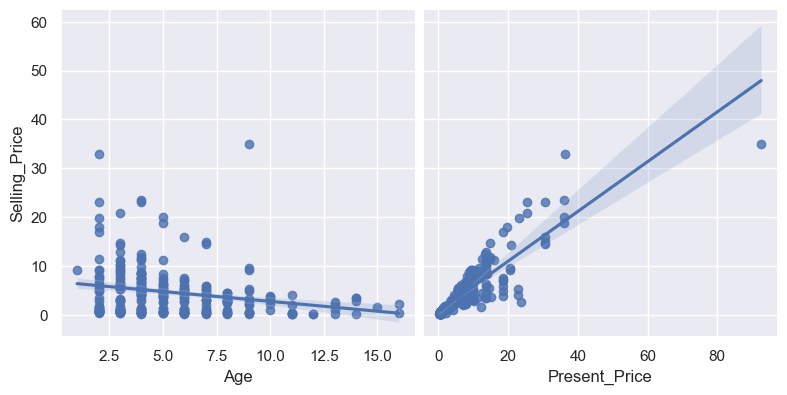

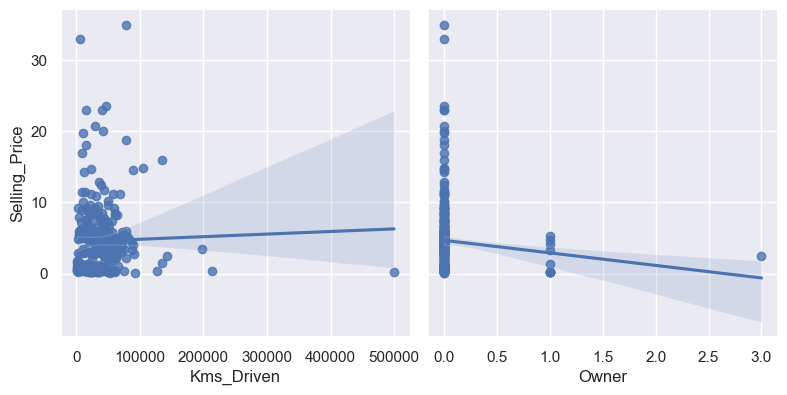

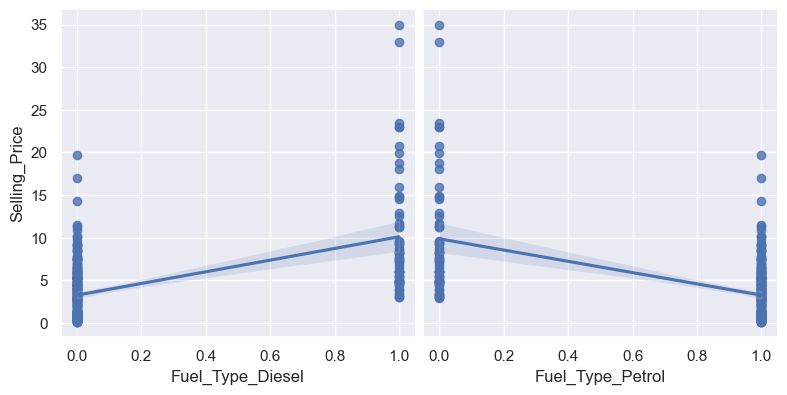

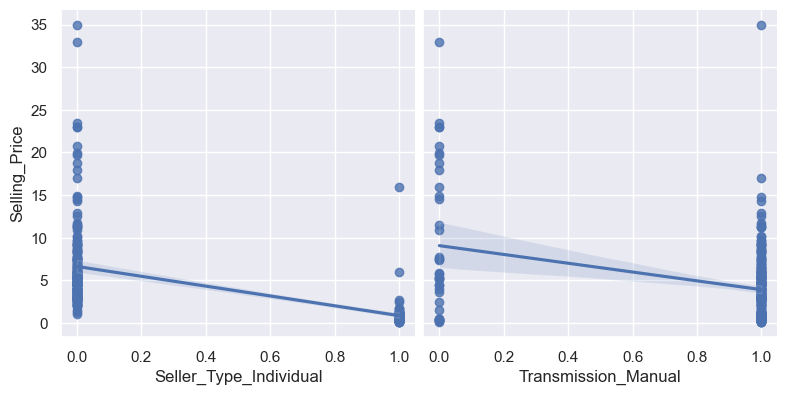

In [463]:
def p(x,y):
    sns.pairplot(Cars, x_vars=[x,y], y_vars="Selling_Price", size=4, aspect =1, kind='reg')
    plt.show()

p('Age', 'Present_Price')
p('Kms_Driven', 'Owner')
p('Fuel_Type_Diesel', 'Fuel_Type_Petrol')
p('Seller_Type_Individual', 'Transmission_Manual')

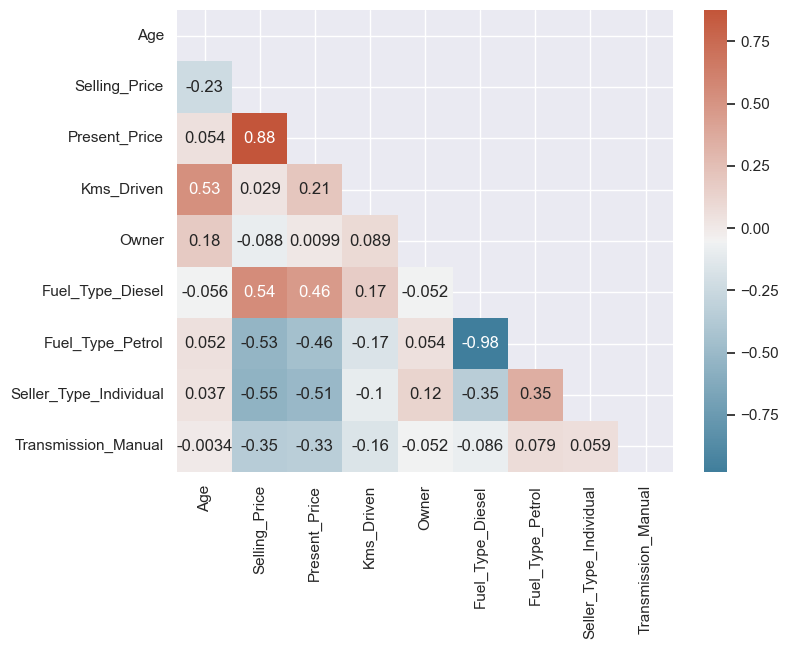

In [464]:
plt.subplots(figsize=(8,6))
corr=Cars.corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
cmap= sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
plt.show()

In [465]:
Cars.shape

(299, 9)

In [466]:
X= Cars.drop("Selling_Price", axis=1)
y=Cars["Selling_Price"].values.reshape(-1,1)
print("X=",X.shape,"\ny=", y.shape)


X= (299, 8) 
y= (299, 1)


In [467]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)
print("X_train=",X_train.shape,"\nx_test=", X_test.shape)

X_train= (224, 8) 
x_test= (75, 8)


In [468]:
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [469]:
print("score", model.score(X_test,y_test))

score 0.8089626228859107


In [470]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model_new= LinearRegression()

In [471]:
kfold_validation= KFold(7,random_state=0, shuffle=True)

In [472]:
results=cross_val_score(model_new, X, y, cv=kfold_validation)
print ('Results=', results)
print ('Mean=' ,np.mean(results))

Results= [0.75198494 0.83654101 0.80269692 0.895501   0.86381484 0.81506587
 0.82209575]
Mean= 0.8268143329151998


In [473]:
from sklearn import preprocessing

In [474]:
Scalar=preprocessing.MinMaxScaler(feature_range=(0,1))
Norm1= Scalar.fit_transform(Cars)
Norm1_Cars= pd.DataFrame(Norm1, columns=['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [475]:
Norm1_Cars.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.292308,0.128643,0.078251,0.072906,0.014493,0.193980,0.799331,0.354515,0.869565
std,0.193125,0.142815,0.092847,0.078108,0.082907,0.396076,0.401172,0.479168,0.337346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133333,0.021490,0.009536,0.029029,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.266667,0.097708,0.062635,0.063063,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.400000,0.169054,0.103164,0.096864,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


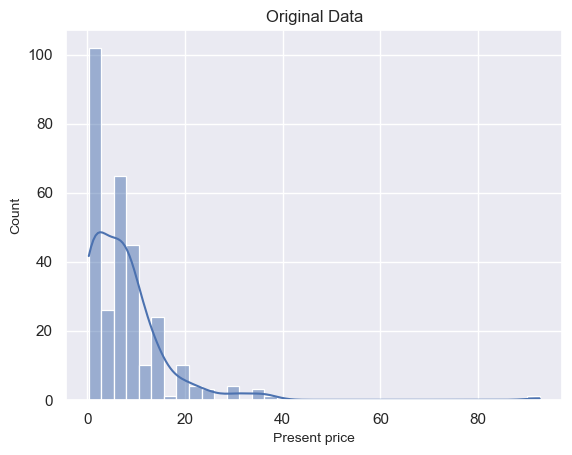

In [476]:
sns.histplot(Cars.Present_Price, kde=True, legend=True)
plt.title("Original Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

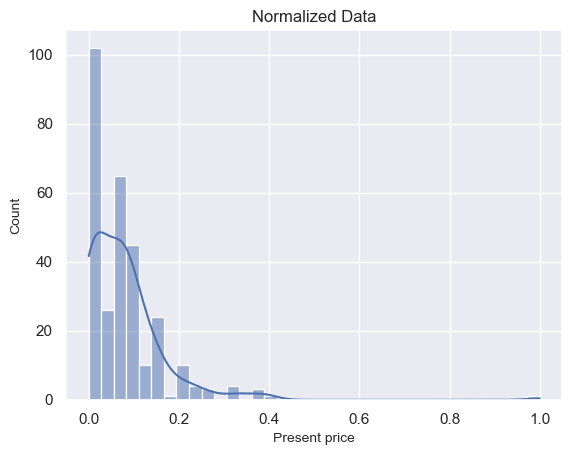

In [477]:
sns.histplot(Norm1_Cars.Present_Price,kde=True,legend=True)
plt.title("Normalized Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

In [478]:
Scaler_2=preprocessing.StandardScaler()
Norm2=Scaler_2.fit_transform(Cars)
Norm2_Cars=pd.DataFrame(Norm2,columns=['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

In [479]:
Norm2_Cars.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,-1.128789e-16,-1.188199e-17,4.752794e-17,-4.158695e-17,0.000000,-1.188199e-17,-1.188199e-16,7.129191e-17,5.346893e-17
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.516109e+00,-9.022758e-01,-8.442155e-01,-9.349646e-01,-0.175101,-4.905751e-01,-1.995829e+00,-7.410957e-01,-2.581989e+00
25%,-8.245502e-01,-7.515492e-01,-7.413342e-01,-5.626912e-01,-0.175101,-4.905751e-01,5.010449e-01,-7.410957e-01,3.872983e-01
50%,-1.329920e-01,-2.169723e-01,-1.684724e-01,-1.262328e-01,-0.175101,-4.905751e-01,5.010449e-01,-7.410957e-01,3.872983e-01
75%,5.585663e-01,2.834399e-01,2.687731e-01,3.072346e-01,-0.175101,-4.905751e-01,5.010449e-01,1.349353e+00,3.872983e-01
max,3.670579e+00,6.111534e+00,9.944291e+00,1.188921e+01,11.906871,2.038424e+00,5.010449e-01,1.349353e+00,3.872983e-01


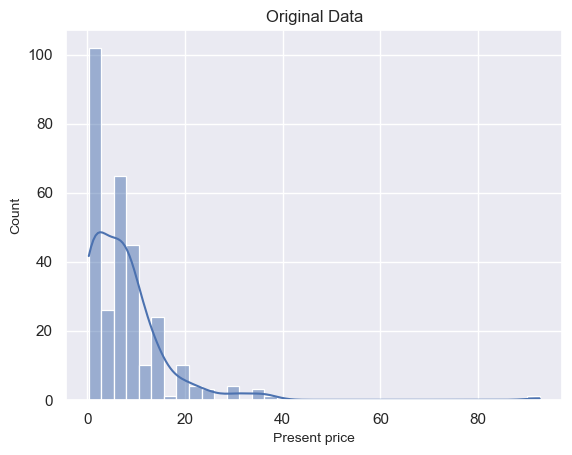

In [480]:
sns.histplot(Cars.Present_Price, kde=True, legend=True)
plt.title("Original Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

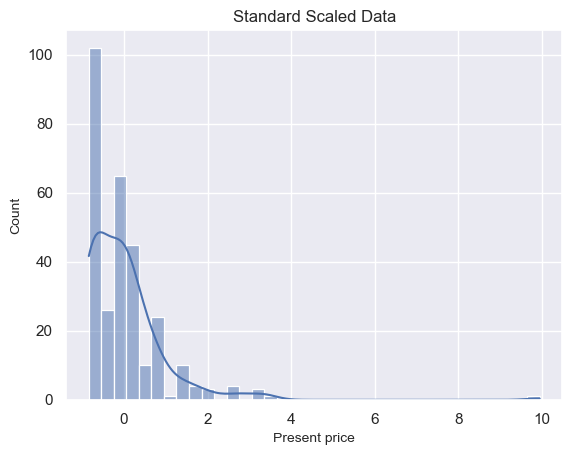

In [481]:
sns.histplot(Norm2_Cars.Present_Price, kde=True, legend=True)
plt.title("Standard Scaled Data", size=12)
plt.xlabel("Present price", size=10)
plt.ylabel('Count', size=10)
plt.show()

In [482]:
y_pred = model.predict(X_test)

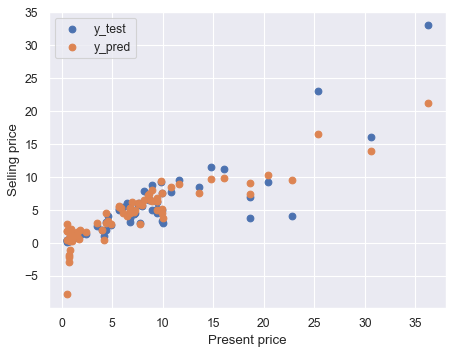

In [483]:
a=X_test.Present_Price
b=y_test

c=X_test.Present_Price
d=y_pred


plt.figure(dpi=80)
plt.scatter(a,b)
plt.scatter(c,d)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Present price")
plt.ylabel("Selling price")
plt.show()

In [484]:
X_test.insert(8, "y_test", y_test)
X_test.insert(9,"y_pred",y_pred)
X_test.head()

,Age,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,y_test,y_pred
208,2,8.10,3435,0,False,True,False,True,7.9,6.495591
190,11,0.75,60000,0,False,True,True,True,0.2,-1.840845
12,4,9.94,15000,0,False,True,False,False,7.5,7.568134
221,6,6.79,32000,0,False,True,False,False,4.5,5.341598
239,7,4.43,23709,0,False,True,False,True,2.0,3.052327


In [485]:
Cars_Age= X_test.sort_values(by="Age")

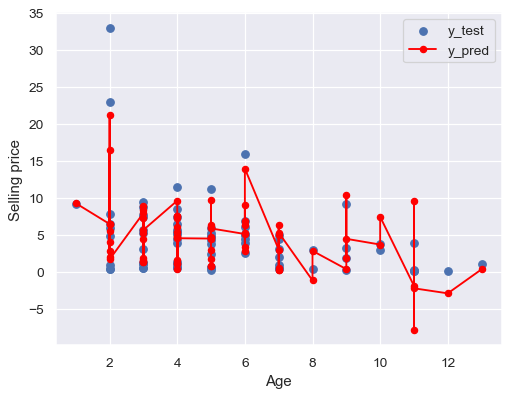

In [486]:
a=Cars_Age.Age
b=Cars_Age.y_test

c=Cars_Age.Age
d=Cars_Age.y_pred

plt.figure(dpi=90)
plt.scatter(a,b)
plt.plot(c, d, color="red", marker = 'o', ms=5)
plt.legend(["y_test", "y_pred"])
plt.xlabel("Age")
plt.ylabel("Selling price")
plt.show()

In [487]:
Cars_Present_Price= X_test.sort_values(by="Present_Price")

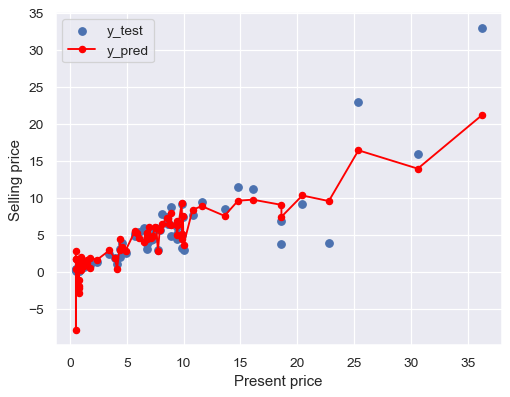

In [488]:
a=Cars_Present_Price.Present_Price
b=Cars_Present_Price.y_test

c=Cars_Present_Price.Present_Price
d=Cars_Present_Price.y_pred
plt.figure(dpi=90)
plt.scatter(a,b)
plt.plot(c,d, marker="o",ms=5, color="red")
plt.legend(["y_test", "y_pred"])
plt.xlabel("Present price")
plt.ylabel("Selling price")
plt.show()

In [489]:
Cars_Kms_Driven= X_test.sort_values(by="Kms_Driven")

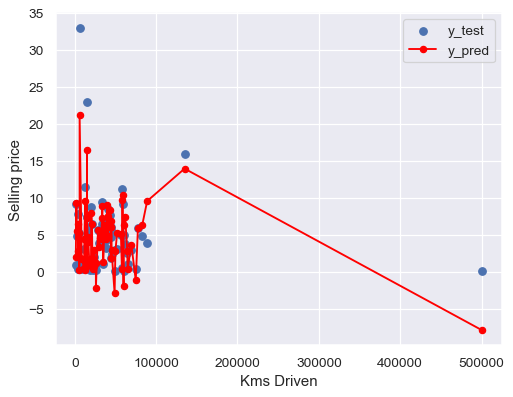

In [490]:
a=Cars_Kms_Driven.Kms_Driven
b=Cars_Kms_Driven.y_test

c=Cars_Kms_Driven.Kms_Driven
d=Cars_Kms_Driven.y_pred

plt.figure(dpi=90)
plt.scatter(a,b)
plt.plot(c,d, marker="o",ms=5, color="red")
plt.legend(["y_test", "y_pred"])
plt.xlabel("Kms Driven")
plt.ylabel("Selling price")
plt.show()

In [491]:
print('Intercept: ',model.intercept_)
print('Co efficients: ', model.coef_)

Intercept:  [4.04306038]
Co efficients:  [[-3.15282470e-01  4.21041908e-01 -1.58640880e-05 -8.77336545e-01
   2.57750944e+00  8.39008233e-01 -1.50688363e+00 -1.11185869e+00]]


In [492]:
# Features: ➡️ X1=Age, X2=Present_Price, X3=Kms_Driven, X4=Owner, X5=Fuel_Type_Diesel, X6=Fuel_Type_Petrol, X7=Seller_Type_Individual, X8=Transmission_Manual

# Linear regression equation: ➡️ y = 4.04306038 + (-3.15282470e-01 X1) + (4.21041908e-01 X2) + (-1.58640880e-05 X3) + (-8.77336545e-01 X4) + (2.57750944e+00 X5) + (8.39008233e-01 X6) + (-1.50688363e+00 X7) + (-1.11185869e+00 X8)

In [493]:
print("Initial model metrices: ")
print("Initial MAE", metrics.mean_absolute_error(y_test,y_pred))
print("Initial MSE", metrics.mean_squared_error(y_test,y_pred))
print("Initial RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Initial model metrices: 
Initial MAE 1.24450780779475
Initial MSE 4.982872010580199
Initial RMSE 2.2322347570495804


In [494]:
print ("Initial model R2 Score:", model.score (X_train, y_train)) 
print ("Initial model R2 Score:", metrics.r2_score (y_test, y_pred))


Initial model R2 Score: 0.8977783408436153
Initial model R2 Score: 0.8089626228859107


In [495]:
Actual_Predicted= pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten() })
Actual_Predicted

,Actual,Predicted
0,7.90,6.495591
1,0.20,-1.840845
2,7.50,7.568134
3,4.50,5.341598
4,2.00,3.052327
...,...,...
70,0.48,1.723693
71,4.95,6.307682
72,5.30,4.795125
73,1.95,1.889165


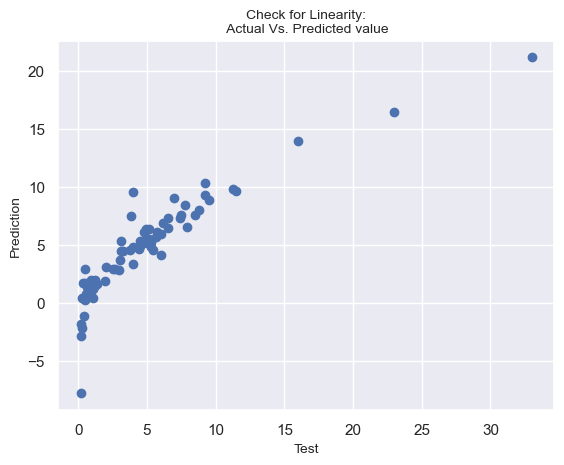

In [496]:
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

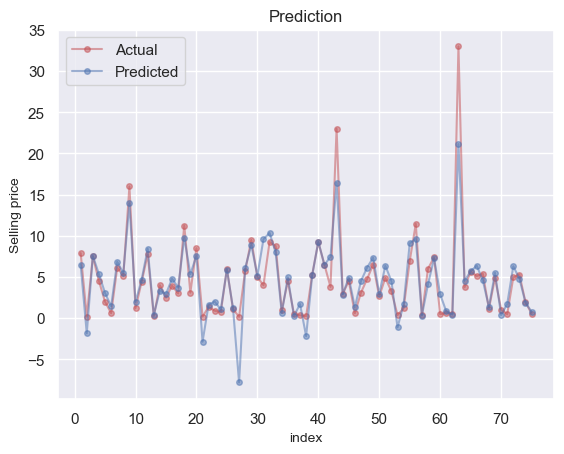

In [497]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

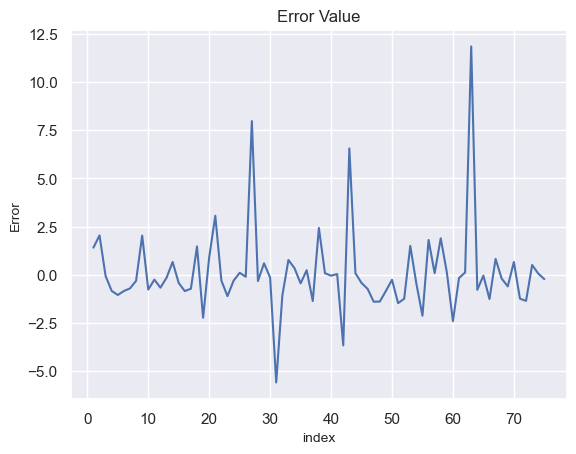

In [498]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()

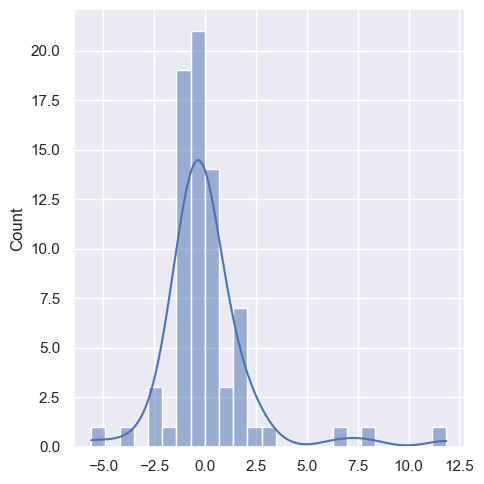

In [499]:
sns.displot(y_test-y_pred, bins=25, kde=True, legend=False)
plt.show() 

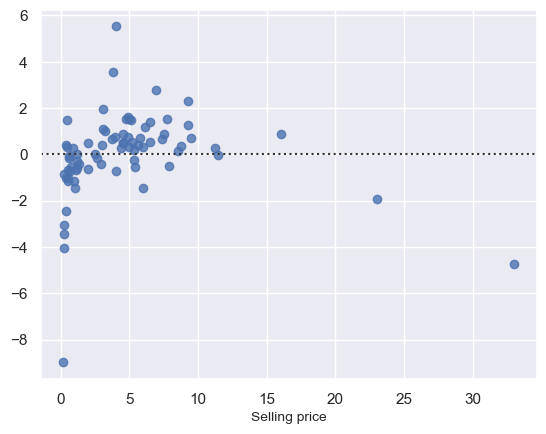

In [500]:
sns.residplot(x=y_test, y=y_pred)
plt.xlabel('Selling price', size=10)
plt.show()

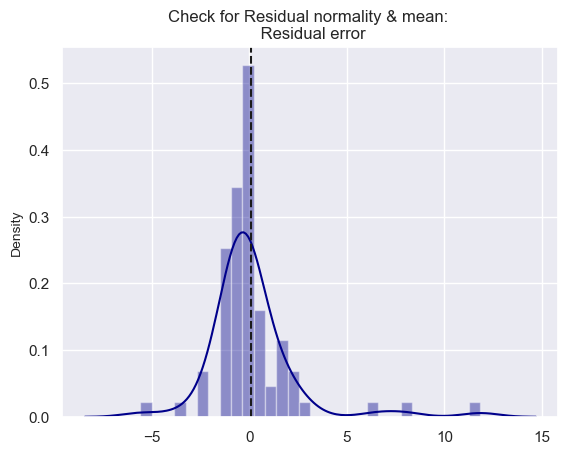

In [501]:
# Check for Residual normality & mean
sns.distplot((y_test - y_pred), color='darkblue')
plt.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
plt.title('Check for Residual normality & mean: \n Residual error', size=12)
plt.ylabel('Density', size=10 )
plt.show()

In [502]:
Norm1_Cars.head()


,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.266667,0.093123,0.057109,0.053053,0.0,0.0,1.0,0.0,1.0
1,0.333333,0.133238,0.099913,0.085085,0.0,1.0,0.0,0.0,1.0
2,0.066667,0.204871,0.103273,0.012813,0.0,0.0,1.0,0.0,1.0
3,0.466667,0.078797,0.041504,0.009409,0.0,0.0,1.0,0.0,1.0
4,0.266667,0.128940,0.070980,0.083984,0.0,1.0,0.0,0.0,1.0


In [503]:
X = Norm1_Cars.drop('Selling_Price', axis=1)
y = Norm1_Cars['Selling_Price'].values.reshape(-1,1)

In [504]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25,random_state=0)

In [505]:
model_normalized=LinearRegression()
model_normalized.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [506]:
print('Intercept:',model_normalized.intercept_)
print('Coefficients:',model_normalized.coef_)

Intercept: [0.10758107]
Coefficients: [[-0.13550822  1.11328789 -0.22705192 -0.07541575  0.07385414  0.02404035
  -0.04317718 -0.03185842]]


In [507]:
y_pred=model_normalized.predict(X_test)

In [508]:
print ("Normalized model metrics:")
print ("Normalized model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Normalized model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Normalized model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Normalized model metrics:
Normalized model MAE: 0.03565924950703202
Normalized model MSE: 0.004090994335499105
Normalized model RMSE: 0.06396088129082576


In [509]:
print ("Normalized model R2 Score:", metrics.r2_score (y_test, y_pred))


Normalized model R2 Score: 0.8089626228858698


In [510]:
Norm2_Cars.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.132992,-0.249127,-0.228097,-0.254603,-0.175101,-0.490575,0.501045,-0.741096,0.387298
1,0.212787,0.032229,0.233700,0.156181,-0.175101,2.038424,-1.995829,-0.741096,0.387298
2,-1.170329,0.534651,0.269942,-0.770651,-0.175101,-0.490575,0.501045,-0.741096,0.387298
3,0.904345,-0.349612,-0.396448,-0.814297,-0.175101,-0.490575,0.501045,-0.741096,0.387298
4,-0.132992,0.002084,-0.078451,0.142061,-0.175101,2.038424,-1.995829,-0.741096,0.387298


In [511]:
X = Norm2_Cars.drop('Selling_Price', axis=1)
y = Norm2_Cars['Selling_Price'].values.reshape(-1,1)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [513]:
model_normalized_2 = LinearRegression()

In [514]:
model_normalized_2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [515]:
print('Intercept:',model_normalized_2.intercept_)
print('Coefficients:',model_normalized_2.coef_)

Intercept: [-0.0046958]
Coefficients: [[-0.18324392  0.72376924 -0.12417944 -0.04378024  0.20482367  0.06753022
  -0.14486673 -0.07525337]]


In [516]:
y_pred = model_normalized_2.predict(X_test)


In [517]:
print ("Normalized model metrics:")
print ("Normalized model MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("Normalized model MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("Normalized model RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Normalized model metrics:
Normalized model MAE: 0.25010718582735125
Normalized model MSE: 0.201250431431355
Normalized model RMSE: 0.44860944197749003


In [518]:
print ("Normalized model R2 Score:", metrics.r2_score (y_test, y_pred))

Normalized model R2 Score: 0.80896262288587


In [519]:
# MODEL 2




In [520]:
Cars.shape
Cars.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,5.384615,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,1.000000,0.100000,0.320000,500.000000,0.000000
25%,3.000000,0.850000,1.200000,15000.000000,0.000000
50%,5.000000,3.510000,6.100000,32000.000000,0.000000
75%,7.000000,6.000000,9.840000,48883.500000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,3.000000


In [521]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Best degree 1 with RMSE 2.2322347570495804


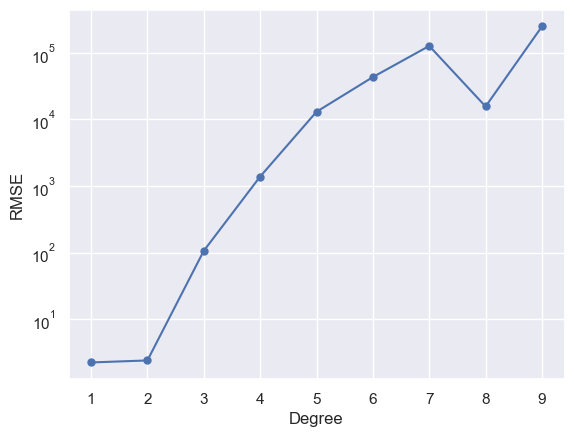

In [523]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Best degree for RMSE
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses, marker = 'o', ms=5)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
plt.show()

r2Score results:  [0.7257732834965921, 0.8020410600166737, -0.02073378224929856, -0.01393190014493606, -0.013522333950856558, -0.013523835815637542, -0.013510748719672394, -0.013582741649370789, -0.013517667832540825]


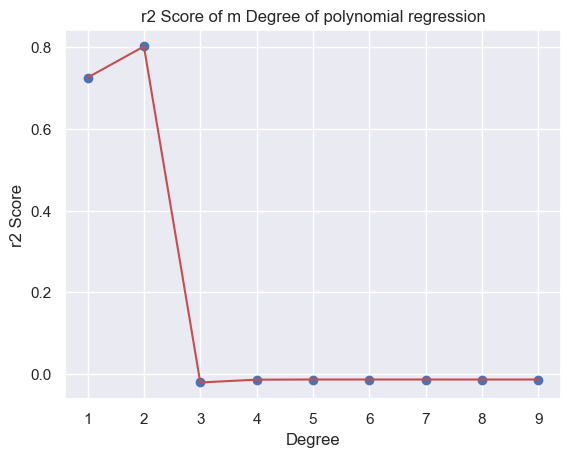

In [524]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

r2=[]
m=1
m_max=9

while m <= m_max:
    model=make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y=model.predict(X_test)
    r2.append(r2_score(pre_y, y_test))
    m=m+1

print("r2Score results: ", r2)
# Plot
plt.plot([i for i in range(1, m_max + 1)], r2, 'r')
plt.scatter([i for i in range(1, m_max + 1)], r2)

#Descriptions

plt.title("r2 Score of m Degree of polynomial regression")
plt.xlabel("Degree")
plt.ylabel("r2 Score")
plt.show()

In [525]:
Age2 = Cars.Age**2
Present_Price7 = Cars.Present_Price**7
Kms_Driven2 = Cars.Kms_Driven**2
Owner2 = Cars.Owner**2

In [526]:
# Adding higher exponent of Features to the initial dataset
Cars.insert(1, 'Age2', Age2)
Cars.insert(4, 'Present_Price7', Present_Price7)
Cars.insert(6, 'Kms_Driven2', Kms_Driven2)
Cars.insert(8, 'Owner2', Owner2)

In [527]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']
X.head()

,Age,Age2,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,25,5.59,1.705621e+05,27000,729000000,0,0,False,True,False,True
1,6,36,9.54,7.191817e+06,43000,1849000000,0,0,True,False,False,True
2,2,4,9.85,8.996086e+06,6900,47610000,0,0,False,True,False,True
3,8,64,4.15,2.120004e+04,5200,27040000,0,0,False,True,False,True
4,5,25,6.87,7.222660e+05,42450,1802002500,0,0,True,False,False,True


In [528]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [530]:
print('Intercept:',regressor.intercept_)
print('Coefficients:',regressor.coef_)

Intercept: 4.711618183993929
Coefficients: [-6.18929170e-01  2.43130702e-02  5.42614213e-01 -2.58202172e-13
 -3.21415057e-05  7.43158788e-11 -2.08442944e-01 -5.54153992e-01
  7.55934181e-01 -7.75420871e-01 -7.66593844e-01  1.61628958e-02]


In [531]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])


,Coefficients
Age,-6.189292e-01
Age2,2.431307e-02
Present_Price,5.426142e-01
Present_Price7,-2.582022e-13
Kms_Driven,-3.214151e-05
Kms_Driven2,7.431588e-11
Owner,-2.084429e-01
Owner2,-5.541540e-01
Fuel_Type_Diesel,7.559342e-01
Fuel_Type_Petrol,-7.754209e-01


In [532]:
y_pred = regressor.predict(X_test)
print ("Improved model metrics:")
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

Improved model metrics:
MAE: 1.1430561331621016
MSE: 3.430506581295288
RMSE: 1.8521626767903754


In [533]:
print ("Improved model R2 Score:", regressor.score (X_train, y_train)) 
print ("Improved model R2 Score:", metrics.r2_score (y_test, y_pred)) 

Improved model R2 Score: 0.9192851119290334
Improved model R2 Score: 0.8684784642126571


In [534]:
print('Improved accuracy =', ((0.8684784642126571 / 0.8089626228859885) - 1) * 100,'%')


Improved accuracy = 7.357057006459056 %


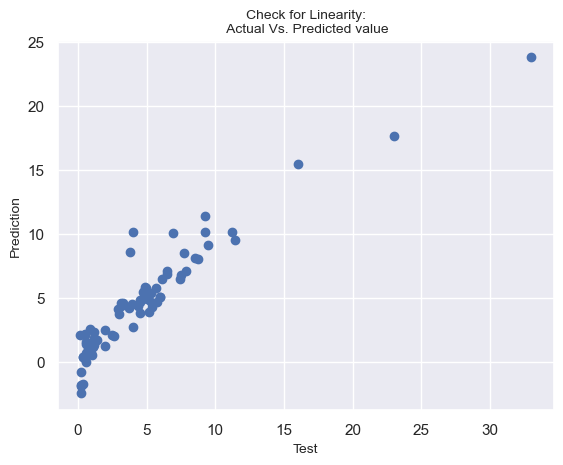

In [535]:
# Check for Linearity of improved model
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

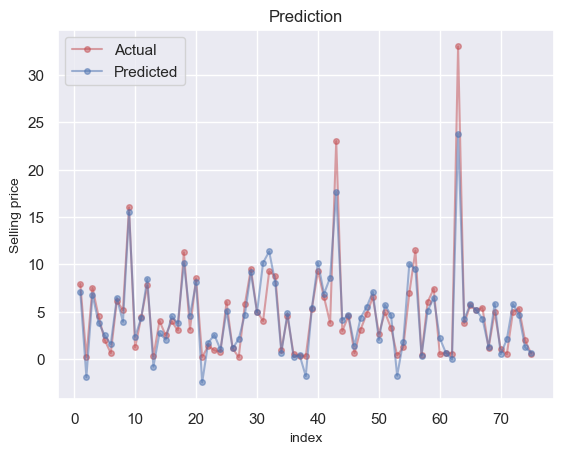

In [536]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

In [537]:
actual_y_test = np.exp(y_test)
actual_predicted = np.exp(y_pred)
diff = abs(actual_y_test - actual_predicted)

compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)

,Test Data,Predicted Price,Difference
208,2697,1208,1488
190,1,0,1
12,1808,878,930
221,90,46,43
239,7,12,4


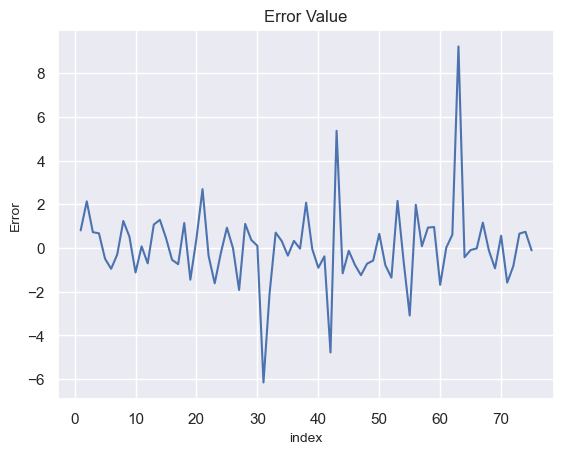

In [538]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()

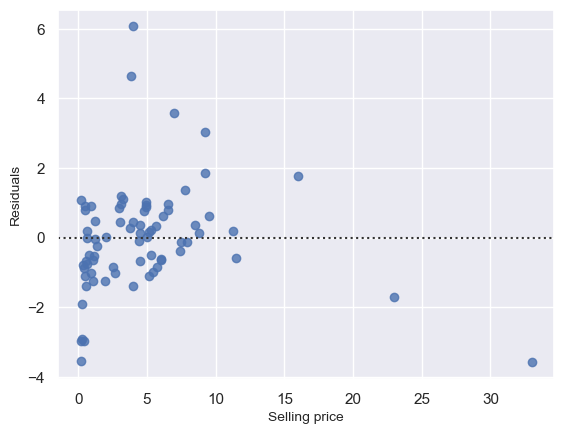

In [541]:
sns.residplot(x=y_test, y=y_pred)
plt.xlabel('Selling price', size=10)
plt.ylabel('Residuals', size=10)
plt.show()


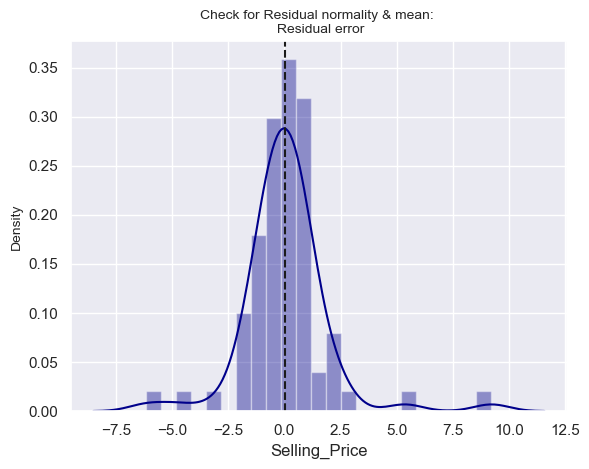

In [542]:

sns.distplot((y_test - y_pred), color='darkblue')
plt.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
plt.title('Check for Residual normality & mean: \n Residual error', size=10);
plt.ylabel('Selling price', size=10 )
plt.ylabel('Density', size=10 )
plt.show()

In [544]:
model_new = LinearRegression()
kfold_validation = KFold(10, shuffle=True, random_state=0)
results = cross_val_score (model_new, X, y, cv=kfold_validation)

In [545]:
print ('Results:', results)
print ('Mean:', np.mean(results))

Results: [ 8.46288019e-01  7.82618892e-01  8.90159837e-01  8.47362335e-01
  7.39692779e-01  9.42301869e-01 -3.26901505e+03  7.58309833e-01
  8.88470197e-01  7.31109139e-01]
Mean: -326.15887413746026


In [546]:
X.shape


(299, 12)

In [547]:
X_ = X[X.index<180]
X__ = X[X.index>210]

In [548]:
print(X_.shape,"\n", X__.shape)   


(178, 12) 
 (90, 12)


In [549]:
#Joining X_ & X__
X_f = pd.concat([X_, X__], axis=0)
X_f.shape

(268, 12)

In [550]:
y.shape


(299,)

In [551]:

y_ = y[y.index<180]
y__ = y[y.index>210]

In [552]:
print(y_.shape,"\n", y__.shape) 


(178,) 
 (90,)


In [553]:
#Joining y_ & y__
y_f = pd.concat([y_, y__], axis=0)
y_f.shape

(268,)

In [554]:
y_f = y_f.values.reshape(-1,1)
y_f.shape

(268, 1)

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size = 0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 1.1729808932159358
MSE: 3.401433001016082
RMSE: 1.8442974274818262


In [558]:
print ("R2 Score (K-Fold(10)):", metrics.r2_score (y_test, y_pred))

R2 Score (K-Fold(10)): 0.8530158953735599


In [559]:
print('Improved accuracy (K-Fold(10)):', ((0.8516647781481199 / 0.8089626228859885) - 1) * 100,'%')


Improved accuracy (K-Fold(10)): 5.278631429198888 %


In [560]:
model_new = LinearRegression()
kfold_validation = KFold(7, shuffle=True, random_state=0)
results = cross_val_score (model_new, X, y, cv=kfold_validation)
print ('Results:', results)
print ('Mean:', np.mean(results))

Results: [ 8.31314930e-01  8.82595804e-01  8.18249029e-01  9.05285130e-01
 -2.46067670e+03  8.15033468e-01  7.54933108e-01]
Mean: -350.8098977422869


In [563]:
X.shape

(299, 12)

In [564]:
299/7


42.714285714285715

In [565]:
X_ = X[X.index<170]
X__ = X[X.index>214]
print(X_.shape,"\n", X__.shape)           

(168, 12) 
 (86, 12)


In [566]:
#Joining X_ & X__
X_f = pd.concat([X_, X__], axis=0)
X_f.shape

(254, 12)

In [ ]:
y.shape


(299,)

In [568]:
y_ = y[y.index<170]
y__ = y[y.index>214]
print(y_.shape,"\n", y__.shape) 

(168,) 
 (86,)


In [569]:
#Joining y_ & y__
y_f = pd.concat([y_, y__], axis=0)
y_f.shape

(254,)

In [570]:
y_f = y_f.values.reshape(-1,1)
y_f.shape

(254, 1)

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size = 0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 1.02361992523426
MSE: 2.4376168543415235
RMSE: 1.561286922491034


In [574]:
print ("R2 Score (K-Fold(7)):", metrics.r2_score (y_test, y_pred))
print('Improved accuracy (K-Fold(7)):', ((0.8880369766543386 / 0.8089626228859885) - 1) * 100,'%')


R2 Score (K-Fold(7)): 0.8872709705179568
Improved accuracy (K-Fold(7)): 9.774784585998653 %


In [ ]:

# 🏎️Predicting the Selling price of a car with features mentioned earlier in the description🏎️¶


In [ ]:
Cars.head()

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,25,3.35,5.59,1.705621e+05,27000,729000000,0,0,False,True,False,True
1,6,36,4.75,9.54,7.191817e+06,43000,1849000000,0,0,True,False,False,True
2,2,4,7.25,9.85,8.996086e+06,6900,47610000,0,0,False,True,False,True
3,8,64,2.85,4.15,2.120004e+04,5200,27040000,0,0,False,True,False,True
4,5,25,4.60,6.87,7.222660e+05,42450,1802002500,0,0,True,False,False,True


In [576]:
df_sample = pd.DataFrame({"Age":[10],
                          "Age2":[10**2],
                          "Selling_Price":[5], #hypothetical number
                          "Present_Price":[11.23],
                          "Present_Price7":[11.23**7],
                          "Kms_Driven":[42000],
                          "Kms_Driven2":[42000**2],
                          "Owner":[1],
                          "Owner2":[1**2],
                          "Fuel_Type_Diesel":[0],
                          "Fuel_Type_Petrol":[1],
                          "Seller_Type_Individual":[0],
                          "Transmission_Manual":[1]})
df_sample

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,100,5,11.23,2.252466e+07,42000,1764000000,1,1,0,1,0,1


In [577]:
#Joining Cars & df_sample
df_f = pd.concat([Cars,df_sample], axis=0)
df_f.reset_index(drop=True, inplace=True) 
df_f.tail()

,Age,Age2,Selling_Price,Present_Price,Present_Price7,Kms_Driven,Kms_Driven2,Owner,Owner2,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
295,4,16,4.00,5.90,2.488651e+05,60000,3600000000,0,0,0,1,0,1
296,10,100,3.35,11.00,1.948717e+07,87934,7732388356,0,0,0,1,0,1
297,2,4,11.50,12.50,4.768372e+07,9000,81000000,0,0,1,0,0,1
298,3,9,5.30,5.90,2.488651e+05,5464,29855296,0,0,0,1,0,1
299,10,100,5.00,11.23,2.252466e+07,42000,1764000000,1,1,0,1,0,1


In [578]:
df_f.shape


(300, 13)

In [579]:
train_sample= df_f.iloc[:299]
test_sample= df_f.iloc[299:]

In [580]:
X_train_sample= df_f[['Age', 'Age2', 'Present_Price', 'Present_Price7', 'Kms_Driven', 'Kms_Driven2', 'Owner', 'Owner2', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']][:299]
y_train_sample= df_f['Selling_Price'][:299].values.reshape(-1,1)
X_test_sample = df_f[['Age', 'Age2', 'Present_Price', 'Present_Price7', 'Kms_Driven', 'Kms_Driven2', 'Owner', 'Owner2', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']][299:]

In [581]:
sample = LinearRegression()
sample.fit(X_train_sample, y_train_sample)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [582]:
y_pred = sample.predict(X_test_sample)
print('Predicted Selling-price:', y_pred*1000,'$$$')

Predicted Selling-price: [[4262.07237777]] $$$


In [583]:
Age = 10
Present_Price = 11.23
Kms_Driven = 42000
Owner = 1
Diesel = 0
Petrol = 1
Seller_Type = 0
Transmission = 1

# Linear regression equation
y = (3.6856786008127758 + (-6.189292e-01 * Age) + (2.431307e-02 * (Age**2)) + (5.426142e-01 * Present_Price) + (-2.582022e-13 * (Present_Price**7)) + (-3.214151e-05 * Kms_Driven) + (7.431588e-11 * (Kms_Driven**2)) + (-2.084429e-01 * Owner) + (-5.541540e-01 * (Owner**2)) + (7.559342e-01 * Diesel) + (-7.754209e-01 * Petrol) + (-7.665938e-01 * Seller_Type) + (1.616290e-02 * Transmission))
print('Predicted Selling-price:',y*1000,'$$$')

Predicted Selling-price: 3280.5401432153467 $$$


In [584]:
Cars.shape


(299, 13)

In [586]:
Present_Price_Age = Cars.Present_Price * Cars.Age
Age_Kms_Driven = Cars.Age * Cars.Kms_Driven
Age_Owner = Cars.Age * Cars.Owner
Present_Price_Age2 = Cars.Present_Price * Age2
Age2_Kms_Driven = Age2 * Cars.Kms_Driven
# Adding interactions between the Features to the dataset
Cars.insert(5, 'Present_Price_Age', Present_Price_Age)
Cars.insert(2, 'Age_Kms_Driven', Age_Kms_Driven)
Cars.insert(3, 'Age_Owner', Age_Owner)
Cars.insert(10, 'Present_Price_Age2', Present_Price_Age2)
Cars.insert(11, 'Age2_Kms_Driven', Age2_Kms_Driven)
Cars.shape

(299, 18)

In [587]:
X = Cars.drop('Selling_Price', axis=1)
y = Cars['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [588]:
print('Intercept:',regressor.intercept_)
print('Coefficients:',regressor.coef_)

Intercept: 1.0847613131420042
Coefficients: [ 1.19699154e-01 -3.25043684e-03  1.68081357e-06 -3.09032088e-02
  1.11839359e+00  1.58194945e-13 -1.47537915e-01 -1.62811353e-05
  3.07848740e-11  5.78197707e-03 -1.06559786e-07  4.15371631e-03
 -3.76040447e-02  6.07977614e-01 -6.20470749e-01 -5.10674447e-01
 -1.41517755e-01]


In [589]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])


,Coefficients
Age,1.196992e-01
Age2,-3.250437e-03
Age_Kms_Driven,1.680814e-06
Age_Owner,-3.090321e-02
Present_Price,1.118394e+00
Present_Price7,1.581949e-13
Present_Price_Age,-1.475379e-01
Kms_Driven,-1.628114e-05
Kms_Driven2,3.078487e-11
Present_Price_Age2,5.781977e-03


In [590]:
y_pred = regressor.predict(X_test)
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))
print ("MSE:", metrics.mean_squared_error (y_test, y_pred))
print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 0.57838076353944
MSE: 0.6662373670552377
RMSE: 0.8162336473432333


In [591]:
print ("Improved model R2 Score:", regressor.score (X_train, y_train)) 
print ("Improved model R2 Score:", metrics.r2_score (y_test, y_pred)) 


Improved model R2 Score: 0.9803381034693464
Improved model R2 Score: 0.9744572529923743


In [592]:
print('Improved accuracy:', ((0.9744572529923743 / 0.8089626228859885) - 1) * 100,'% improved compared to the initial model (Model 1) accuracy')


Improved accuracy: 20.457636165683503 % improved compared to the initial model (Model 1) accuracy


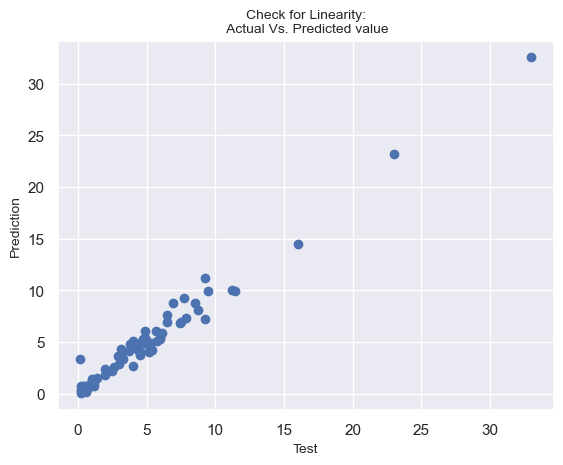

In [593]:
# Check for Linearity of Initial model
plt.scatter(y_test, y_pred)
plt.title('Check for Linearity:\n Actual Vs. Predicted value', size=10)
plt.xlabel("Test", size=10)
plt.ylabel("Prediction", size=10)
plt.show()

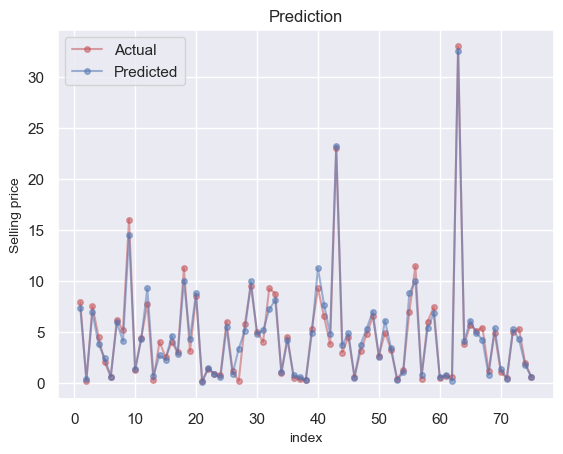

In [594]:
# Plotting the actual and predicted values
r = [i for i in range (1, len(y_test)+1, 1)]
plt.plot(r, y_test, color = 'r', marker = 'o', ms=4, alpha = 0.5, label = 'Actual')
plt.plot(r, y_pred, color = 'b', marker = 'o', ms=4, alpha = 0.5, label = 'Predicted')
plt.title('Prediction', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Selling price', size=10)
plt.legend(loc = 'upper left')
plt.show()

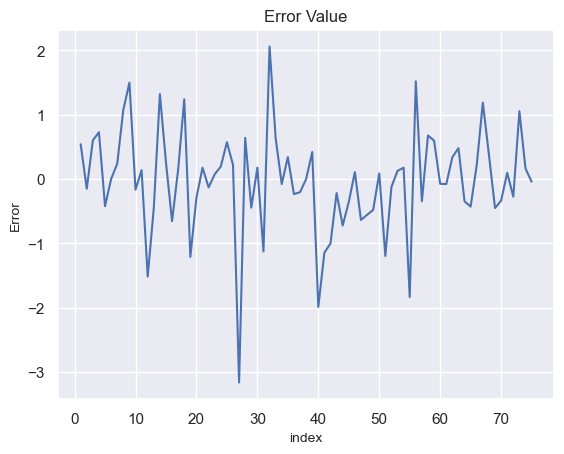

In [595]:
# Plotting the error
r = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(r, y_test-y_pred, linestyle='-')
plt.title('Error Value', size=12)
plt.xlabel('index', size=10)
plt.ylabel('Error', size=10)
plt.show()